# **DE COMPRAS**

Los minoristas suelen ofrecer grandes descuentos para iniciar la temporada navideña, por ejemplo. Es común que los minoristas ofrezcan promociones especiales y abran sus puertas durante las horas previas al amanecer para atraer clientes. 

Para mantenerse al día con la competencia, los minoristas necesitan algunos conocimientos y un grupo de clientes para segmantizarlos y dirigirse a ellos. Por tanto, los minoristas pueden utilizar diferentes estrategias de marketing para atraer diferentes tipos de clientes.  

Un analista de datos puede ayudar a los minoristas con información adecuada basada en los datos históricos de las compras y también brindar soluciones adecuadas basadas en datos mediante el uso de métodos de Machine Learning. Por lo tanto, pueden lograr su objetivo/meta. Este proyecto trata sobre esto. 

### **1. Entendimiento del negocio** 

Como se mencionó anteriormente, el objetivo de todos los minoristas es atraer cada vez a más clientes para sus ofertas. Esto es como una competencia para atraer clientes a sus plataformas en línea o tiendas minoristas físicas. Entonces, comencemos a explorar el conjunto de datos. 

  

Primero importaremos bibliotecas y cargaremos los datos. 

In [2]:
import numpy as np # algebra lineal 
import pandas as pd # marco de datos 

# para plotear 
import seaborn as sns
import matplotlib.pyplot as plt

# para preprocesar
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# algoritmos Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# herramientas 
import os
import warnings
import pickle
from math import sqrt


# ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# standard scaler object
stdscaler = StandardScaler()

In [2]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [3]:
df_sales = pd.read_csv("sales_group_1.csv")

### **2. Comprensión de los datos**
Ahora que tenemos el marco de datos, podemos comenzar a hacer EDA (Análisis de datos exploratorios), DA (Análisis descriptivo).

Echemos un vistazo a las primeras 5 filas.

In [4]:
df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_sales.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
91602,1002063,P00346442,M,26-35,4,A,3,0,1,2.0,14.0,8099
70640,1004826,P00282242,M,46-50,12,C,1,1,5,8.0,17.0,8875
492766,1003868,P00048042,M,18-25,12,C,0,0,1,6.0,8.0,11796
81347,1000549,P00177342,M,26-35,6,A,3,0,8,NaN,NaN,9994
10426,1001605,P00030842,F,18-25,0,B,1,0,1,2.0,15.0,12044
8528,1001306,P00196042,M,26-35,3,B,3,0,4,9.0,15.0,2181
172661,1002727,P00112142,M,26-35,11,C,0,0,1,2.0,14.0,15275
260079,1004042,P00295242,M,36-45,15,B,3,1,8,NaN,NaN,5882
358164,1001181,P00112642,M,36-45,7,A,3,1,1,2.0,5.0,15221
466348,1005826,P00058042,M,18-25,4,A,2,1,8,16.0,NaN,9750


Análisis descriptivo de todos los campos que incluye el recuento de valores no nulos, tipos de datos, media, mediana, mínimo, máximo, etc.

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_sales.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Forma de datos y valores únicos de usuarios y productos.

In [8]:
print("Columnas -> {}".format(list(df_sales.columns)))
print()
print("==============================================")
print("Total Transacciones -> {}".format(df_sales.shape[0]))

unique_users = len(df_sales.User_ID.unique())
print("Total Usuarios unicos -> {}".format(unique_users))

unique_products = len(df_sales.Product_ID.unique())
print("Total Productos unicos -> {}".format(unique_products))

Columnas -> ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Total Transacciones -> 550068
Total Usuarios unicos -> 5891
Total Productos unicos -> 3631


Total de transacciones por edad, género, ocupación, ciudad y años de estancia en la ciudad actual 

### **Preguntas**

- ¿Qué grupo de edad ha realizado más transacciones? 
- ¿Los hombres han realizado más transacciones que las mujeres? 
- ¿La ocupación de los usuarios tiene alguna relación con el número de transacciones? 
- ¿Los usuarios que llevan más de 1 año viviendo en la ciudad han realizado más transacciones? 
- ¿La categoría de ciudad tiene algún impacto en la cantidad de compra? 
- ¿El estado civil está relacionado con estas compras? 

### **Creación de gráficos de recuento para campos categóricos importantes**

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

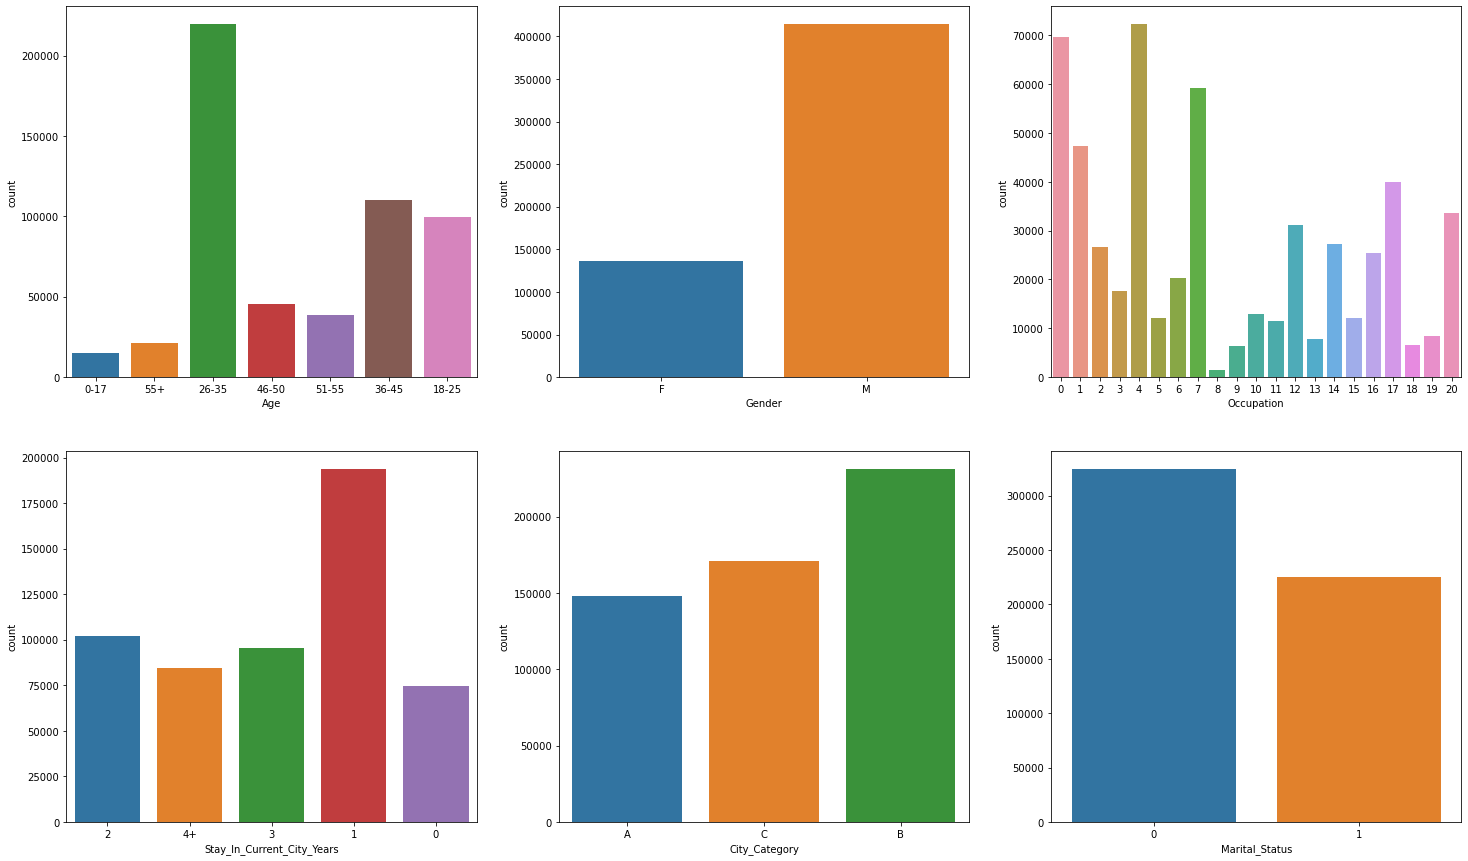

In [9]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

sns.countplot(df_sales["Age"],ax=axis[0,0])
sns.countplot(df_sales["Gender"],ax=axis[0,1])
sns.countplot(df_sales["Occupation"],ax=axis[0,2])
sns.countplot(df_sales["City_Category"],ax=axis[1,1])
sns.countplot(df_sales["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(df_sales["Marital_Status"],ax=axis[1,2])

### De las cifras anteriores podemos concluir que, 

- En el gráfico 1, el rango de edad de 26 a 35 años ha realizado más transacciones. 
- En la figura 2, los usuarios masculinos han realizado más transacciones. 
- En la figura 3, los Usuarios cuyas ocupaciones son 0 y 4 han realizado más transacciones. 
- En la figura 4, los usuarios que permanecieron en la ciudad actual durante 1 año realizaron más transacciones. 
- En la figura 5, los usuarios de la categoría de ciudad B han realizado más transacciones. 
- En la figura 6, los usuarios que aún no están casados han realizado más transacciones. 

==================================================== 

Monto total de compra pagado grupo por edad, sexo, ocupación, ciudad, años de estadía en la ciudad actual y estado civil 

### **Preguntas:**

- ¿Qué grupo de edad ha gastado más en el black friday? 
- ¿Las mujeres han gastado más que los hombres? 
- ¿La ocupación de los usuarios tiene alguna relación con el gasto de dinero en el Black Friday? 
- ¿Los usuarios que llevan más de 1 año viviendo en la ciudad han gastado más dinero? 
- ¿La categoría de ciudad tiene algún impacto en el monto total de la compra? 
- ¿El estado civil está relacionado con el viernes negro? 

Creación de gráficos de recuento para campos categóricos importantes

<AxesSubplot:xlabel='Marital_Status'>

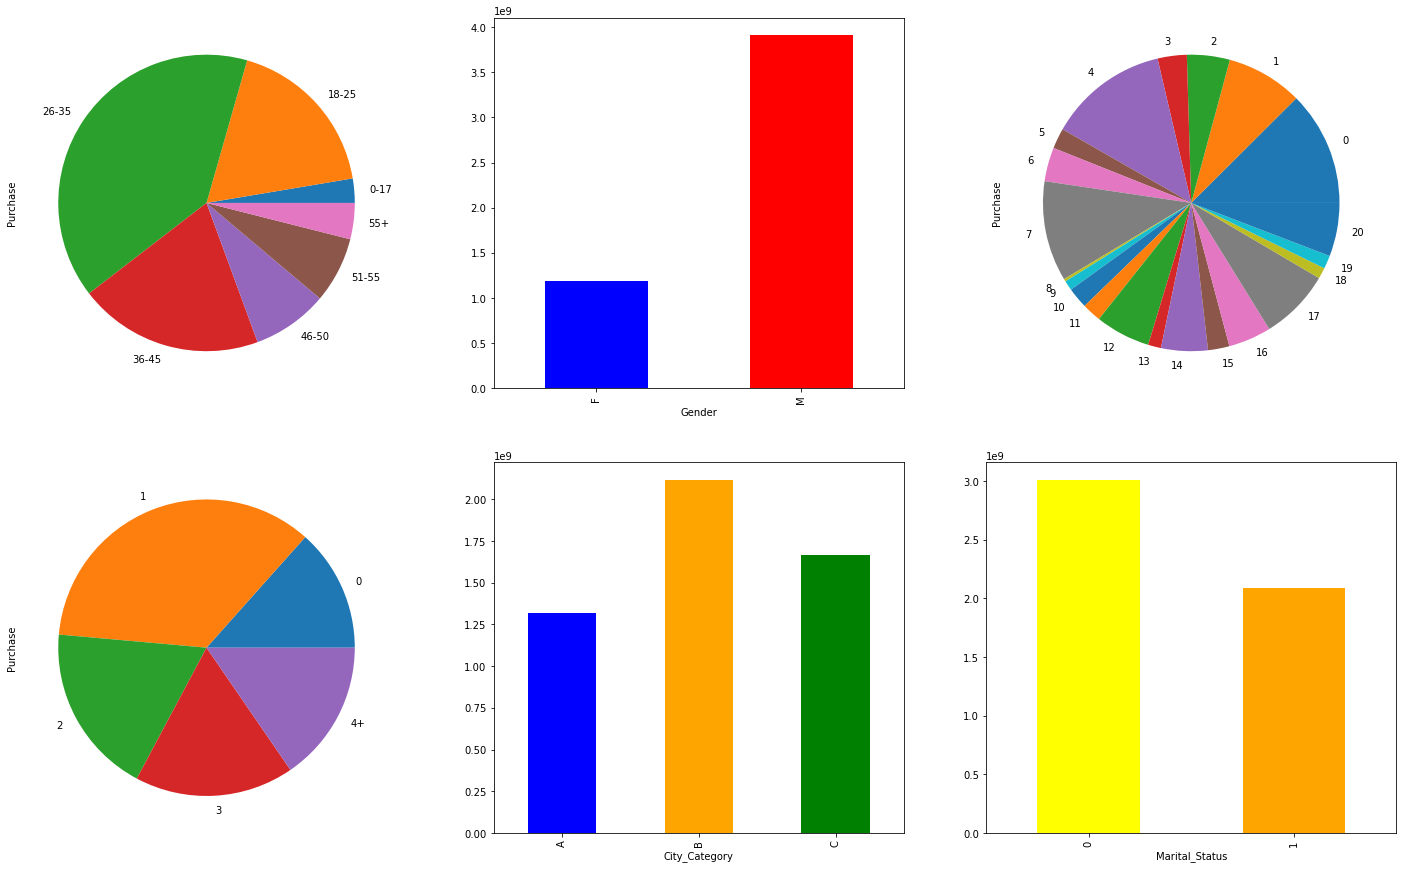

In [10]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

cities_colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
gender = {'F': 'blue', 'M': 'red'}
status = {0: 'yellow', 1: 'orange'}

df_sales.groupby(["Age"])["Purchase"].sum().plot(kind='pie',ax=axis[0,0])
df_sales.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1], color=[gender[g] for g in df_sales['Gender'].unique()])
df_sales.groupby(["Occupation"])["Purchase"].sum().plot(kind='pie',ax=axis[0,2])
df_sales.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1], color=[cities_colors[city] for city in df_sales['City_Category'].unique()])
df_sales.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='pie',ax=axis[1,0])
df_sales.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2], color=[status[s] for s in df_sales['Marital_Status'].unique()])

### De las cifras anteriores podemos concluir que, 

- En la figura 1, el rango de edad de 26 a 35 años ha gastado más dinero. 
- En la figura 2, los usuarios masculinos han gastado más dinero. 
- En la figura 3, los Usuarios cuyas ocupaciones son 0 y 4 han gastado más dinero. 
- En la figura 4, los usuarios que permanecieron en la ciudad actual durante 1 año gastaron más dinero. 
- En la figura 5, los usuarios de la categoría de ciudad B han gastado más dinero. 
- En la figura 6, los usuarios que aún no están casados han gastado más dinero. 

Por cierto, las estadísticas son iguales tanto para el recuento total como para el importe de la compra. Entonces, revisemos la cantidad promedio. 

==================================================== ==================== 

Veamos Monto Promedio Comprado por Edad, Género, Ocupación, Ciudad, Años de Estancia en la Ciudad actual y estado civil 

### **Preguntas:**

- ¿Los valores promedio tienen una historia diferente que contar que los valores totales? 

<AxesSubplot:xlabel='Marital_Status'>

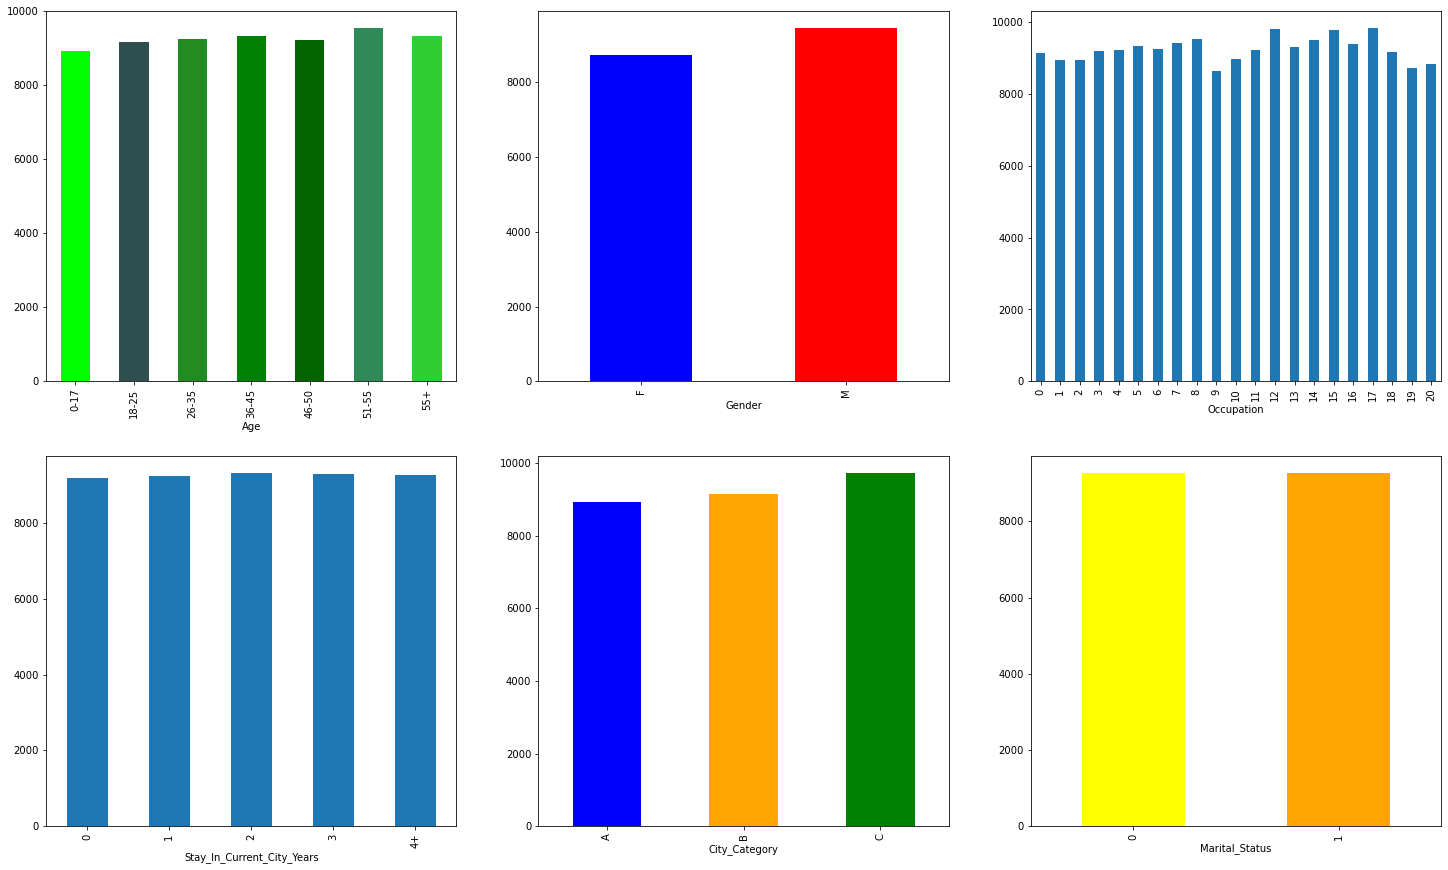

In [11]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(25,15))

age = {'0-17': 'lime', '18-25': 'limegreen', '26-35': 'forestgreen', '36-45': 'seagreen', '46-50': 'green', '51-55': 'darkgreen', '55+': 'darkslategray'}
gender = {'F': 'blue', 'M': 'red'}
cities_colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
status = {0: 'yellow', 1: 'orange'}

df_sales.groupby(["Age"])["Purchase"].mean().plot(kind='bar',ax=axis[0,0], color=[age[a] for a in df_sales['Age'].unique()])
df_sales.groupby(["Gender"])["Purchase"].mean().plot(kind='bar',ax=axis[0,1], color=[gender[g] for g in df_sales['Gender'].unique()])
df_sales.groupby(["Occupation"])["Purchase"].mean().plot(kind='bar',ax=axis[0,2])
df_sales.groupby(["City_Category"])["Purchase"].mean().plot(kind='bar',ax=axis[1,1], color=[cities_colors[city] for city in df_sales['City_Category'].unique()])
df_sales.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar',ax=axis[1,0])
df_sales.groupby(["Marital_Status"])["Purchase"].mean().plot(kind='bar',ax=axis[1,2], color=[status[s] for s in df_sales['Marital_Status'].unique()])

Después de ver las cifras anteriores, podemos concluir que, según los datos, para todas las categorías de los campos categóricos, las cantidades promedio compradas son casi las mismas.

==================================================== ====================

Veamos el Monto total Comprado por género por Edad, Ocupación, Años de Estancia en la Ciudad actual y estado civil

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

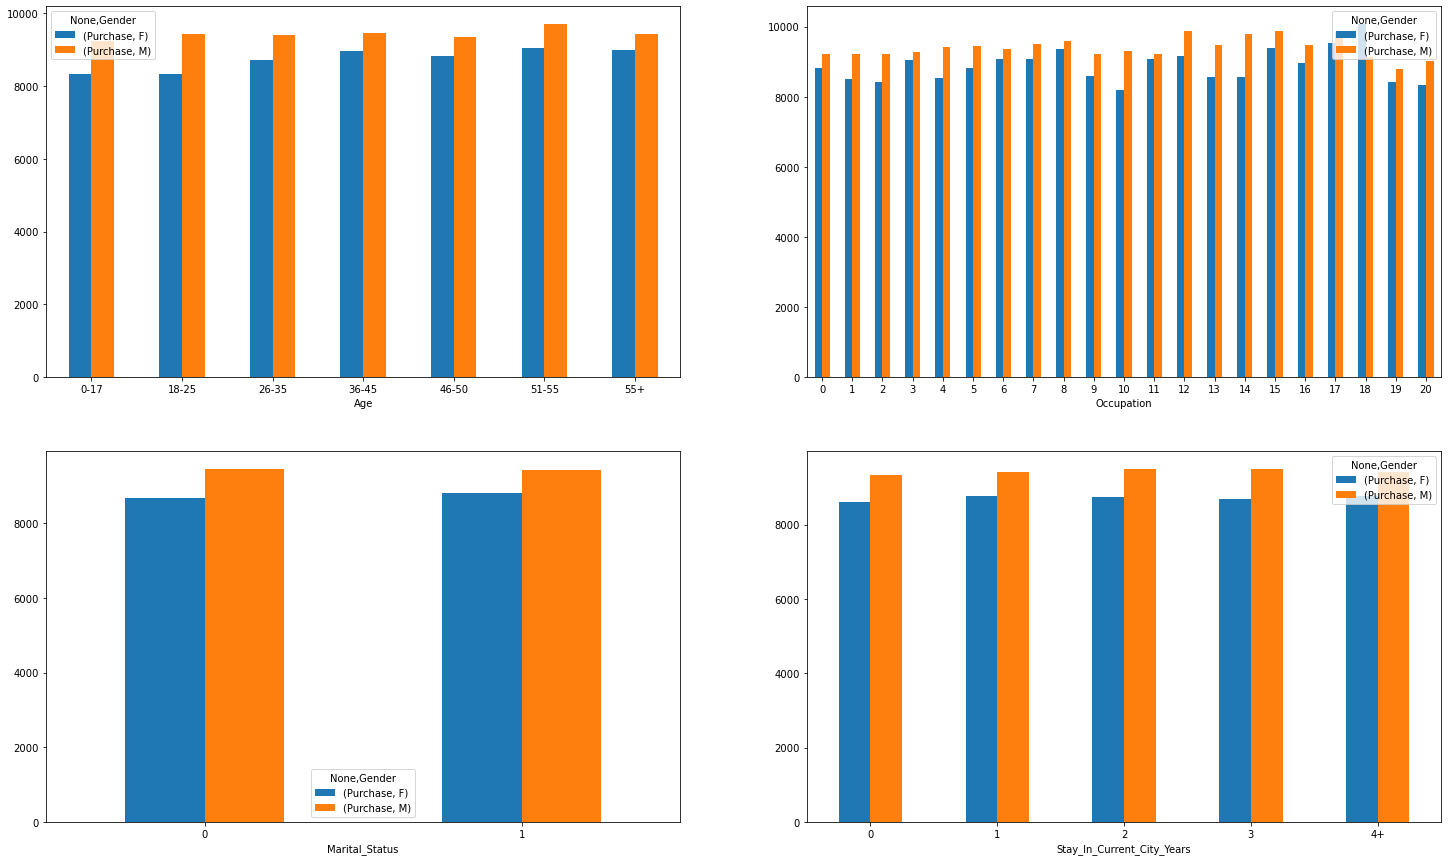

In [12]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(25,15))

df_sales.groupby(["Age","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,0])
df_sales.groupby(["Occupation","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,1])
df_sales.groupby(["Marital_Status","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,0])
df_sales.groupby(["Stay_In_Current_City_Years","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,1])

==================================================== 

Veamos el diagrama de pares con todas las columnas numéricas.

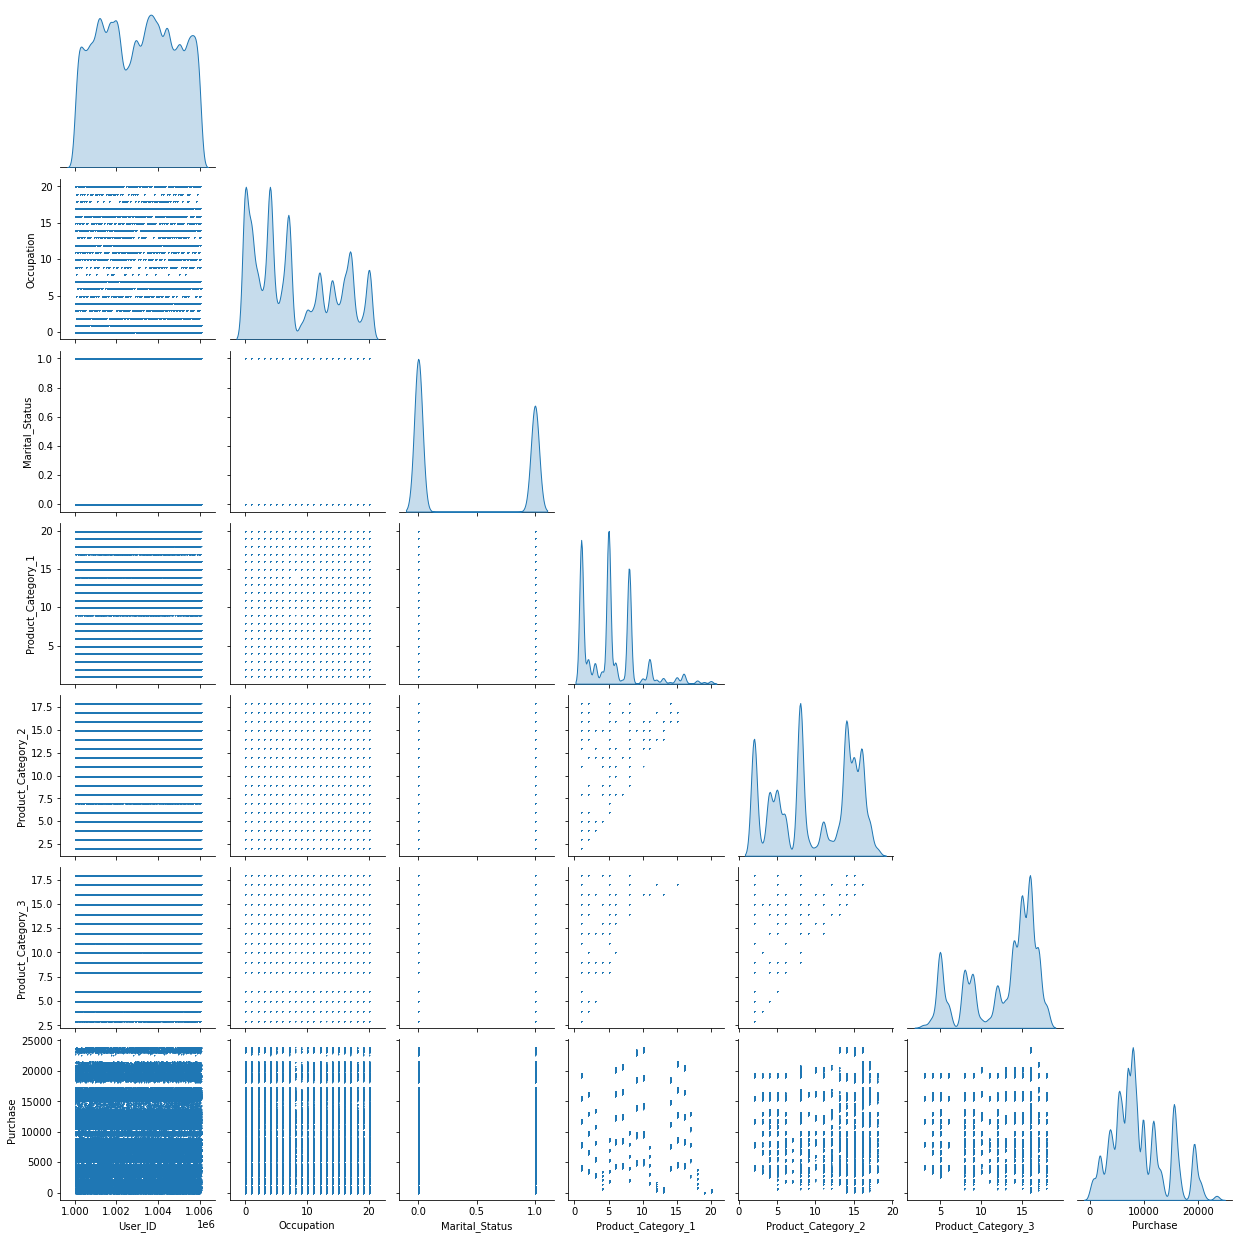

In [13]:
sns.pairplot(df_sales,diag_kind="kde",corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True) )

- El diagrama de pares anterior no brinda más información sobre la correlación entre valores numéricos.
- También se están considerando los campos de estado civil y ocupación, ya que están en forma numérica. Necesitamos cambiar esos campos a tipo categórico.

### **3. Preparar datos**
Manejar valores faltantes

In [17]:
(df_sales.isna().sum()*100/df_sales.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Porcentaje de valores faltantes"})

,Porcentaje de valores faltantes
Product_Category_3,69.672659
Product_Category_2,31.566643
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000


### Categorías de Producto

Las categorías de productos son categorías de ese producto en particular; si el producto pertenece a más de una categoría, habrá algunos valores disponibles para otras categorías de productos. Así que aquí estamos tratando con una característica categórica muy extraña.

déjame mostrarte un ejemplo de product_ID = "P00265242" en particular,

In [15]:
df_sales.loc[df_sales.Product_ID=="P00265242",["User_ID","Product_ID","Product_Category_1" ,"Product_Category_2","Product_Category_3"]]

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
399,1000066,P00265242,5,8.0,NaN
1191,1000196,P00265242,5,8.0,NaN
1372,1000222,P00265242,5,8.0,NaN
1845,1000301,P00265242,5,8.0,NaN
2209,1000345,P00265242,5,8.0,NaN
...,...,...,...,...,...
543413,1005667,P00265242,5,8.0,NaN
544366,1005797,P00265242,5,8.0,NaN
544629,1005837,P00265242,5,8.0,NaN
544834,1005872,P00265242,5,8.0,NaN


Entonces, para una ID de producto particular, tendrá los mismos valores para todas las categorías de productos.

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

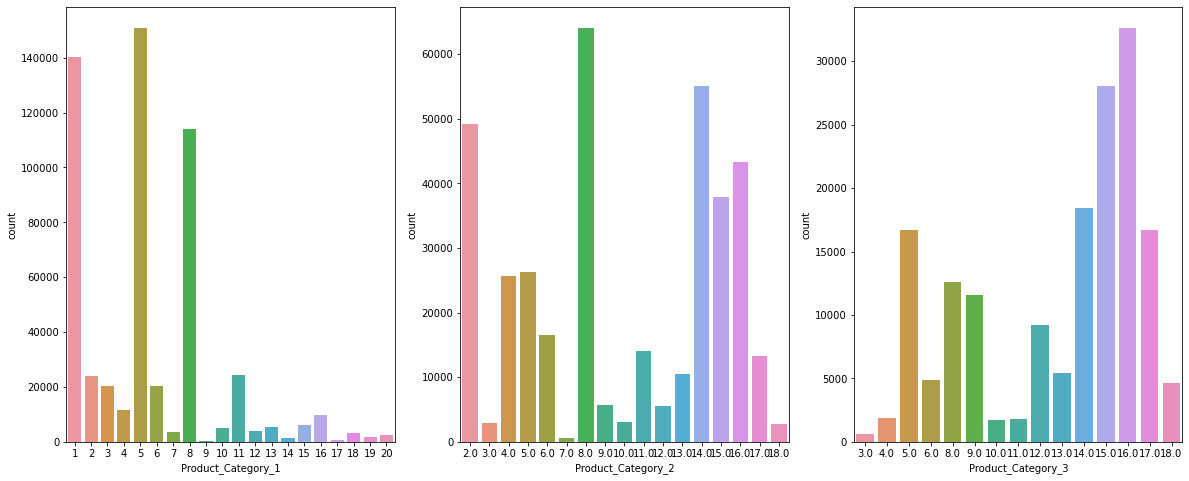

In [18]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,8))

sns.countplot(df_sales["Product_Category_1"],ax=axis[0])
sns.countplot(df_sales["Product_Category_2"],ax=axis[1])
sns.countplot(df_sales["Product_Category_3"],ax=axis[2])

esto es lo que se entendío de los datos, por lo que para completar los valores faltantes solo necesitamos completarlos como cero.

In [19]:
df_sales[["Product_Category_2","Product_Category_3"]] = df_sales[["Product_Category_2","Product_Category_3"]].fillna(0)

### Comprobemos de nuevo

In [20]:
(df_sales.isna().sum()*100/df_sales.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Porcentaje de valores faltantes"})

,Porcentaje de valores faltantes
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category_1,0.0
Product_Category_2,0.0


### **Transformación de datos** 

Ahora no nos faltan valores, por lo que podemos transformar nuestros datos e introducirlos en el modelo de aprendizaje automático para el entrenamiento. 

### **Para la transformación:**  

- **Campos categóricos:** utilizaremos el codificador de etiquetas para etiquetar todas las categorías. 
- **Campos numéricos:** podemos estandarizar los valores según el escalador estándar y transformar los datos en media = 0, std = 1. Por cierto, parece que en realidad no es necesario, ya que todos los campos son solo campos algo categóricos. 
 

Obtenga dos marcos de datos que contengan solo campos independientes y solo campos dependientes en nuevas variables 

In [22]:
# codificador de categorias
le = LabelEncoder()

df_sales["Age"] = le.fit_transform(df_sales["Age"])
df_sales["Stay_In_Current_City_Years"] = le.fit_transform(df_sales["Stay_In_Current_City_Years"])
df_sales["City_Category"] = le.fit_transform(df_sales["City_Category"])

# eliminando variables innesesarias
train_dropped_df = df_sales.drop(['User_ID', 'Product_ID'],axis=1)
print("Se eliminó el campo de identificación de usuario y producto.")

train_dropped_df = pd.get_dummies(train_dropped_df)

X = train_dropped_df.drop(columns= ["Purchase"])
# marcos de datos separados, uno es para campos independientes y otro para la variable dependiente (variable objetivo)
y = train_dropped_df['Purchase'].values

Se eliminó el campo de identificación de usuario y producto.


### ¿Cuál es la correlación entre las variables?

<AxesSubplot:title={'center':'Pearson - correlacion de caracteristicas'}>

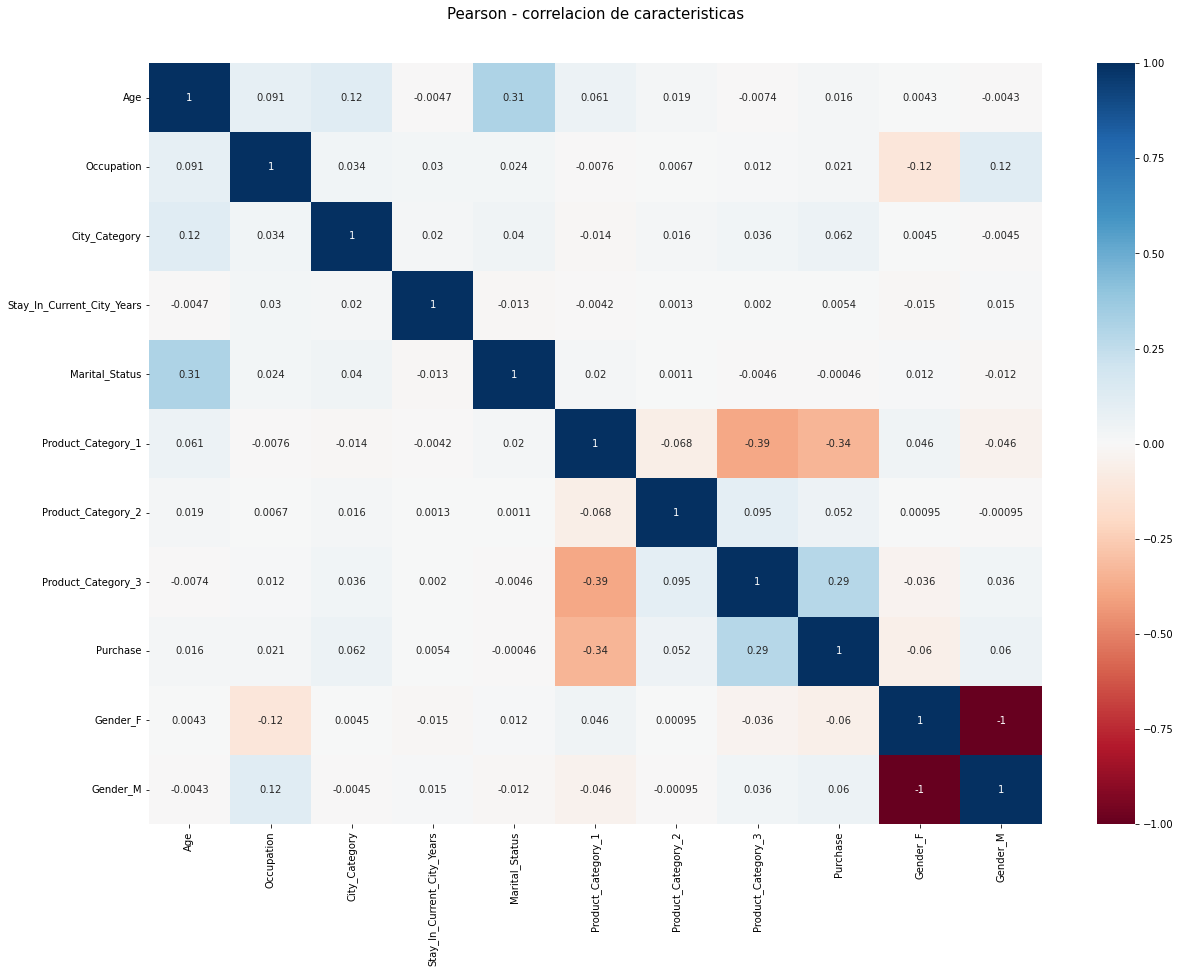

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,14))
plt.title('Pearson - correlacion de caracteristicas', y=1.05, size=15)
sns.heatmap(train_dropped_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

In [28]:
print("Input dimension -> {}".format(X.shape))
print("Output dimension -> {}".format(y.shape))

Input dimension -> (550068, 10)
Output dimension -> (550068,)


4. Modelado de datos 
5. Evaluar los resultados: Divida los datos en conjuntos de datos de entrenamiento y prueba en un 70 % -30 %

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Input train dimension -> {}".format(X_train.shape))
print("Input test dimension -> {}".format(X_test.shape))

Input train dimension -> (385047, 10)
Input test dimension -> (165021, 10)


### Entrenando diferentes modelos y evaluando los resultados.

In [30]:
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    '''
    Esta función sirve para ajustarse al modelo de aprendizaje automático y evaluar la puntuación R2 para los datos de entrenamiento y prueba.
    
    ENTRADA:
    model - Machine Learning model
    X_train - Datos de entrenamiento
    y_train - Valores de salida del entrenamiento
    X_test - Datos de prueba
    y_test - valores de salida de prueba
    
    SALIDA:
    model - Modelo de aprendizaje automático entrenado
    '''
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # El método de puntuación proporciona la puntuación R2 en realidad, por lo que podemos verificar directamente la puntuación R2
    print("Entrenamiento R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Prueba R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))
    print()
    print("=============================================")
    print()
    print("Entrenamiento RMSE  -> {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Prueba RMSE  -> {}".format(sqrt(mean_squared_error(y_test,y_pred_test))))
    return model

### **1. Regresión lineal**

In [31]:
lr = LinearRegression(n_jobs=-1)
train_and_evaluate(lr,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.15303197386504241
Prueba R-2 Score -> 0.1502225848000539


Entrenamiento RMSE  -> 4623.897758674754
Prueba RMSE  -> 4627.777465694635


LinearRegression(n_jobs=-1)

### **2. Regresor de árbol de decisión**

In [32]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
train_and_evaluate(dtr,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.620705208649921
Prueba R-2 Score -> 0.6151249212697111


Entrenamiento RMSE  -> 3094.305250315925
Prueba RMSE  -> 3114.4385769651567


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10, min_samples_leaf=2,
                      min_samples_split=5, random_state=142)

### **3. Regresor de bosque aleatorio**

In [33]:
rf = RandomForestRegressor(max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=142)
train_and_evaluate(rf,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.6562463716226338
Prueba R-2 Score -> 0.6491769152142575


Entrenamiento RMSE  -> 2945.7667802369456
Prueba RMSE  -> 2973.4727049991225


RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      random_state=142)

### **4. Regresor KNN**

In [34]:
knnreg = KNeighborsRegressor(n_neighbors = 6)
train_and_evaluate(knnreg,X_train,y_train,X_test,y_test)

Entrenamiento R-2 Score -> 0.6873118953438755
Prueba R-2 Score -> 0.5858752100425049


Entrenamiento RMSE  -> 2809.5087876751913
Prueba RMSE  -> 3230.6171115435855


KNeighborsRegressor(n_neighbors=6)

### **5. Regresor XGBoost**

In [35]:
# Varios hiperparámetros para ajustar
xgbr = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #el llamado valor `eta`
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

fitted_xgb = train_and_evaluate(xgb_grid,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Entrenamiento R-2 Score -> 0.6909899600948919
Prueba R-2 Score -> 0.6725129894829014


Entrenamiento RMSE  -> 2792.936166542493
Prueba RMSE  -> 2872.8762176076675


In [36]:
print(fitted_xgb.best_score_)
print(fitted_xgb.best_params_)

0.6756733795987431
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


### **Conclusiones**

Hicimos diferentes tipos de análisis de los datos, visualizamos los datos con diferentes tipos de gráficos y entrenamos el modelo con diferentes tipos de modelos de aprendizaje automático para predecir el monto de compra que el usuario podría gastar en una proxima compra.  

Entonces, ahora la pregunta es ¿qué pueden obtener los minoristas de todo esto? Los minoristas ahora tienen informes de análisis y un modelo capacitado, con el que pueden crear diferentes grupos de clientes y ofrecer diferentes tipos de ofertas. Se deben aplicar diferentes tipos de estrategias de marketing para todos y cada uno de los grupos después de que puedan tener un desempeño sobresaliente en la "competencia" del viernes negro. 